# Trabalho 2 Mineração de Dados
Eduardo Alcântara - 428945

In [3]:
!pip install plotnine

In [1]:
import pandas as pd
import numpy as np
import scipy.special as scsp
import scipy
from scipy.stats import ksone
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import scipy.stats as stats
import math
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import random
from plotnine import *
from PIL import Image
%matplotlib inline


### Medidas de Tendência Central e Medidas de Dispersão

### Seja o seguinte dataset:

In [57]:
dataset = pd.read_csv('leiR tweets.csv')
dataset.fillna(0)

,Username,Handle,Timestamp,Comments,Likes,Retweets,Text
0,CAPITÃO CAVERNA,@MarcosPimt,2021-12-06T18:37:59.000Z,CAPITÃO CAVERNAEm resposta a \n@lfcarr\n e \n@...,2.0,0.0,0.0
1,carlos pierre,@carlospgoliv,2021-12-06T18:25:19.000Z,carlos pierreEm resposta a \n@judepaulla1,0.0,0.0,0.0
2,#BrasilRepublicaPresidencialista,@Keila31177845,2021-12-06T18:00:28.000Z,#BrasilRepublicaPresidencialistaEm resposta a ...,0.0,0.0,0.0
3,Projeto Circular,@circularbelem,2021-12-06T17:58:12.000Z,Projeto CircularO Centro Histórico de Belém na...,1.0,0.0,8.0
4,Cnc76 Macho Alpha!!!,@Cnc712,2021-12-06T17:48:58.000Z,Cnc76 Macho Alpha!!!Em resposta a \n@zeliaduncan,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2283,vandecarlos lopes,@carloslopes1956,2021-11-13T11:09:32.000Z,vandecarlos lopesA corrupção da lei rouanet e ...,0.0,0.0,0.0
2284,Otavio Bedinelli,@OtavioBedinelli,2021-11-13T10:39:34.000Z,Otavio BedinelliEm resposta a \n@taoquei1,0.0,0.0,0.0
2285,Kinkas Castro,@KinkasCastro,2021-11-13T10:29:39.000Z,Kinkas CastroEm resposta a \n@katiaduarte\n @b...,1.0,1.0,3.0
2286,"Conservador , Cristão",@BiraFratucello2,2021-11-13T10:14:14.000Z,"Conservador , CristãoTudo que beneficiava a va...",0.0,1.0,1.0


In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288 entries, 0 to 2287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Username   2281 non-null   object 
 1   Handle     2286 non-null   object 
 2   Timestamp  2288 non-null   object 
 3   Comments   2288 non-null   object 
 4   Likes      456 non-null    float64
 5   Retweets   436 non-null    float64
 6   Text       1070 non-null   float64
dtypes: float64(3), object(4)
memory usage: 125.2+ KB


In [60]:
dataset.dtypes

Username      object
Handle        object
Timestamp     object
Comments      object
Likes        float64
Retweets     float64
Text         float64
dtype: object

In [61]:
##correção de tipos do df e nan
df = pd.DataFrame(dataset, columns=['Likes','Text','Retweets','Comments'])
print(df)
df[['Likes','Text','Retweets']] = df[['Likes','Text','Retweets']].astype(float)
print('Converting..................')
print('............................')
df.fillna(0)
print(df)

      Likes  Text  Retweets                                           Comments
0       2.0   NaN       NaN  CAPITÃO CAVERNAEm resposta a \n@lfcarr\n e \n@...
1       NaN   NaN       NaN          carlos pierreEm resposta a \n@judepaulla1
2       NaN   NaN       NaN  #BrasilRepublicaPresidencialistaEm resposta a ...
3       1.0   8.0       NaN  Projeto CircularO Centro Histórico de Belém na...
4       NaN   NaN       NaN   Cnc76 Macho Alpha!!!Em resposta a \n@zeliaduncan
...     ...   ...       ...                                                ...
2283    NaN   NaN       NaN  vandecarlos lopesA corrupção da lei rouanet e ...
2284    NaN   NaN       NaN          Otavio BedinelliEm resposta a \n@taoquei1
2285    1.0   3.0       1.0  Kinkas CastroEm resposta a \n@katiaduarte\n @b...
2286    NaN   1.0       1.0  Conservador , CristãoTudo que beneficiava a va...
2287    NaN   NaN       NaN  Pedro M LelisVAI VENDO BRASIL!!!\nEnquanto o d...

[2288 rows x 4 columns]
Converting.................

In [58]:
dataset['Comments'].astype('string')

0       CAPITÃO CAVERNAEm resposta a 
@lfcarr
 e 
@eri...
1                carlos pierreEm resposta a 
@judepaulla1
2       #BrasilRepublicaPresidencialistaEm resposta a ...
3       Projeto CircularO Centro Histórico de Belém na...
4         Cnc76 Macho Alpha!!!Em resposta a 
@zeliaduncan
                              ...                        
2283    vandecarlos lopesA corrupção da lei rouanet e ...
2284             Otavio BedinelliEm resposta a 
@taoquei1
2285    Kinkas CastroEm resposta a 
@katiaduarte
 @bon...
2286    Conservador , CristãoTudo que beneficiava a va...
2287    Pedro M LelisVAI VENDO BRASIL!!!
Enquanto o di...
Name: Comments, Length: 2288, dtype: string

In [62]:
df['Comments'].astype('string')

0       CAPITÃO CAVERNAEm resposta a 
@lfcarr
 e 
@eri...
1                carlos pierreEm resposta a 
@judepaulla1
2       #BrasilRepublicaPresidencialistaEm resposta a ...
3       Projeto CircularO Centro Histórico de Belém na...
4         Cnc76 Macho Alpha!!!Em resposta a 
@zeliaduncan
                              ...                        
2283    vandecarlos lopesA corrupção da lei rouanet e ...
2284             Otavio BedinelliEm resposta a 
@taoquei1
2285    Kinkas CastroEm resposta a 
@katiaduarte
 @bon...
2286    Conservador , CristãoTudo que beneficiava a va...
2287    Pedro M LelisVAI VENDO BRASIL!!!
Enquanto o di...
Name: Comments, Length: 2288, dtype: string

## Estimativa de Parâmetro (Medidas de Tendência Central)

### Média

In [20]:
Media = df.mean()
print('Média:\n', Media)
Medialikes = dataset['Likes'].mean()
Mediaresp = dataset['Text'].mean()
Mediaretw = dataset['Retweets'].mean()

Média:
 Likes         9.798246
Text        113.690654
Retweets     50.229358
dtype: float64


C:\Users\edard\AppData\Local\Temp/ipykernel_60272/2977276310.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


### Mediana

In [21]:
Mediana = df.median()
print('Mediana:\n', Mediana)
Medianalikes = dataset['Likes'].median()
Medianaresp = dataset['Text'].median()
Medianaretw = dataset['Retweets'].median()

Mediana:
 Likes       1.0
Text        2.0
Retweets    2.0
dtype: float64


C:\Users\edard\AppData\Local\Temp/ipykernel_60272/3177290603.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


### Moda

In [24]:
Moda = df.mode()
print('Moda:\n', Moda)
Modalikes = dataset['Likes'].mode()
Modaresp = dataset['Text'].mode()
Modaretw = dataset['Retweets'].mode()

Moda:
    Likes  Text  Retweets                                           Comments
0    1.0   1.0       1.0  DGSEm resposta a \n@kaibamokkuba\n @nikolas_dm...
1    NaN   NaN       NaN      Edmilson CastillaEm resposta a \n@zeliaduncan
2    NaN   NaN       NaN  Janderson BarretoEm resposta a \n@AdrianoV3nta...
3    NaN   NaN       NaN  Panfletero! FAROFAFÁ | "Pressionado pela Justi...
4    NaN   NaN       NaN  Paulo Miguel EsdachetiEm resposta a \n@UOLNoti...
5    NaN   NaN       NaN      Wallace NovaesEm resposta a \n@brunogagliasso


In [25]:
#desvio absoluto médio
dataset['Likes'].mad()

14.31794398276404

In [26]:
#variância
dataset['Likes'].var()

1598.3899749373397

In [27]:
#desvio padrão
dataset['Likes'].std()

39.97986962131492

## Tabela de Frequência e Histograma

#### Calculo dos bins e criação das tabelas de frequência

In [28]:
k = int(math.sqrt(len(dataset)))
k

47

In [29]:
j = math.ceil(1 + 3.3 * math.log10( dataset.size ))
j

15

#### Likes

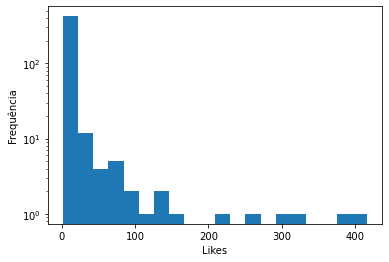

In [30]:
plt.hist(df['Likes'], bins=20)
plt.yscale('log')
# Add Axes Labels
plt.xlabel("Likes") 
plt.ylabel("Frequência")
plt.show()

In [31]:
LikesF = pd.crosstab(index=dataset["Likes"], columns="Freq")
LikesF

col_0,Freq
Likes,
1.0,277
2.0,63
3.0,27
4.0,11
5.0,10
6.0,5
7.0,5
8.0,3
9.0,3


#### Retweets

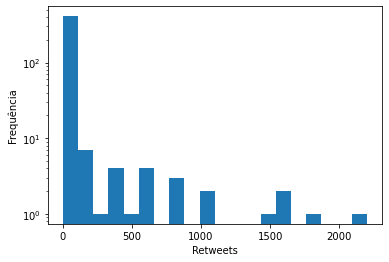

In [32]:
plt.hist(df['Retweets'], bins=20)
plt.yscale('log')
plt.xlabel("Retweets") 
plt.ylabel("Frequência")
plt.show()

In [33]:
RtF = pd.crosstab(index=dataset["Retweets"], columns="count")
RtF

col_0,count
Retweets,
1.0,178
2.0,69
3.0,33
4.0,27
5.0,11
...,...
1500.0,1
1600.0,1
1634.0,1


#### Respostas

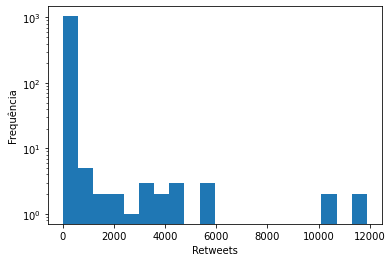

In [34]:
plt.hist(df['Text'], bins=20)
plt.yscale('log')
plt.xlabel("Retweets") 
plt.ylabel("Frequência")
plt.show()

In [35]:
RespF = pd.crosstab(index=dataset["Text"], columns="count")
RespF

col_0,count
Text,
1.0,395
2.0,171
3.0,100
4.0,53
5.0,30
...,...
5900.0,1
10214.0,1
10514.0,1


## Boxplot

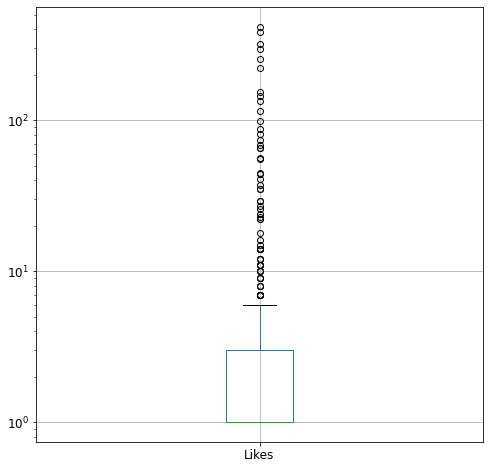

In [36]:
dataset.boxplot(column=['Likes'], fontsize='large', figsize=(8,8))
plt.yscale('log')

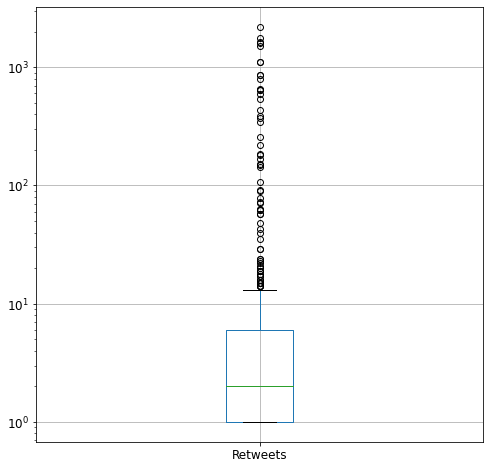

In [37]:
dataset.boxplot(column=['Retweets'], fontsize='large', figsize=(8,8))
plt.yscale('log')

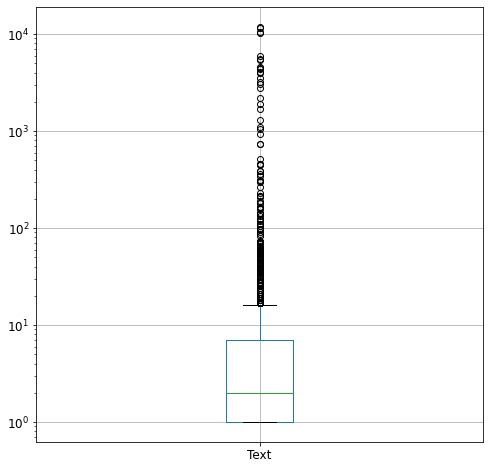

In [38]:
dataset.boxplot(column=['Text'], fontsize='large', figsize=(8,8))
plt.yscale('log')

## Teste de Normalidade

In [39]:
table_df = df.groupby('Likes').size().reset_index(name='Fabs')
newcols = {
    'Likes': 'Xi'
}
table_df.rename(columns=newcols, inplace=True)
table_df['Fac'] = table_df['Fabs'].cumsum()
table_df['Frac'] = table_df['Fac']/table_df['Fac'].max()
Likesstd = df['Likes'].std()  ##Desvio Padrão Likes
table_df['Zi'] = table_df['Xi'].apply(lambda x: (x - Medialikes)/Likesstd)
def zScoreToPvalue(z):
    # Retornar p-value a partir do z-score
    return 0.5 * (1 + scsp.erf(z / np.sqrt(2)))
table_df['FracEsp'] = table_df['Zi'].apply(lambda x: zScoreToPvalue(x))
table_df['D_negativo'] = abs(table_df['FracEsp']-table_df['Frac'])
table_df['D_positivo'] = 0
for i in range(table_df['Frac'].shape[0]):
    if i > 0:
        table_df['D_positivo'].iloc[i] = table_df['FracEsp'].iloc[i] - table_df['Frac'].iloc[i-1]
    else:
        table_df['D_positivo'].iloc[i] = table_df['FracEsp'].iloc[i]
       
table_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Xi,Fabs,Fac,Frac,Zi,FracEsp,D_negativo,D_positivo
0,1.0,277,277,0.607456,-0.220067,0.412910,0.194547,0.412910
1,2.0,63,340,0.745614,-0.195054,0.422675,0.322939,-0.184781
2,3.0,27,367,0.804825,-0.170042,0.432489,0.372336,-0.313125
3,4.0,11,378,0.828947,-0.145029,0.442344,0.386603,-0.362481
4,5.0,10,388,0.850877,-0.120017,0.452235,0.398642,-0.376712
5,6.0,5,393,0.861842,-0.095004,0.462156,0.399686,-0.388721
6,7.0,5,398,0.872807,-0.069991,0.472100,0.400707,-0.389742
7,8.0,3,401,0.879386,-0.044979,0.482062,0.397324,-0.390745
8,9.0,3,404,0.885965,-0.019966,0.492035,0.393930,-0.387351
9,10.0,3,407,0.892544,0.005046,0.502013,0.390531,-0.383952


In [40]:
D = ( table_df[['D_negativo','D_positivo']].max() ).max()
D

0.41290952989877183

In [41]:
def ks_critical_value(n_trials, alpha):
    return ksone.ppf(1-alpha/2, n_trials)
p_value = ks_critical_value(df.shape[0], 0.05)
p_value

0.028318627840068014

In [42]:
if D < p_value:
    print('Os dados seguem uma distribuição normal')
else:
    print('Os dados não seguem uma distribuição normal')

Os dados não seguem uma distribuição normal


## Best Fit Distribution

In [43]:
y_std = scipy.stats.zscore(dataset['Likes'].fillna(0))
y_std = np.array(list(y_std))
y_std = y_std.flatten()
y_std

array([ 0.00258599, -0.10698336, -0.10698336, ..., -0.05219869,
       -0.10698336, -0.10698336])

In [44]:
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

In [45]:
def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

In [46]:
check_distribution(dist_names, y_std)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance  p_value D<p
0          beta  0.513131      0.0  no
1         expon  0.800699      0.0  no
2         gamma  0.492932      0.0  no
3       lognorm  0.777490      0.0  no
4          norm  0.448269      0.0  no
5      pearson3  0.800699      0.0  no
6             t  0.620843      0.0  no
7        triang  0.948239      0.0  no
8       uniform  0.958289      0.0  no
9   weibull_min  0.800699      0.0  no
10  weibull_max  0.569049      0.0  no


## Gráficos

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\geoms\geom_path.py:75: PlotnineWarning: geom_path: Removed 1837 rows containing missing values.


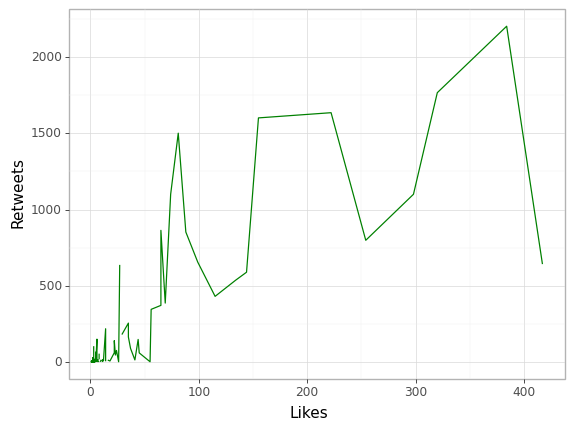

<ggplot: (103884543356)>

In [47]:
(ggplot(df,aes('Likes', 'Retweets'))
  + geom_line(color='green')
  + theme_light()
)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:381: PlotnineWarning: position_stack : Removed 2088 rows containing missing values.


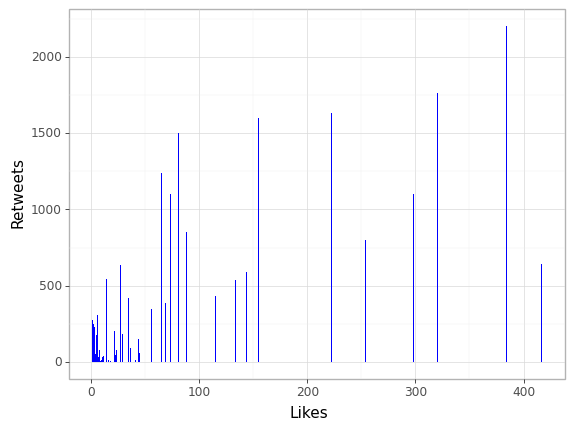

<ggplot: (103884819791)>

In [48]:
(ggplot(df,aes('Likes', 'Retweets'))
  + geom_col(fill='blue')
  + theme_light()
)

Text(0.5, 1.0, 'Correlação entre Likes e Retweets')

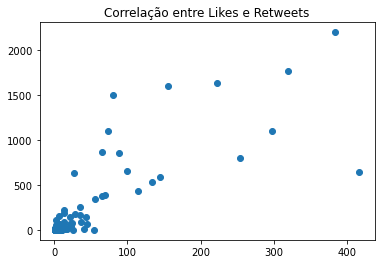

In [49]:
plt.scatter(df['Likes'],df['Retweets'])
plt.title('Correlação entre Likes e Retweets')

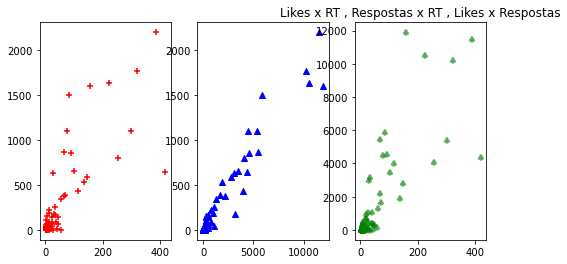

In [50]:
fix, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (8, 4))

ax1.scatter(df['Likes'],df['Retweets'], marker = '+', color = 'red')
ax2.scatter(df['Text'],df['Retweets'], marker = '^', color = 'blue')
ax3.scatter(df['Likes'],df['Text'], marker = '$\clubsuit$', color = 'green',
            alpha = 0.5)
plt.title('Likes x RT , Respostas x RT , Likes x Respostas')

plt.show()

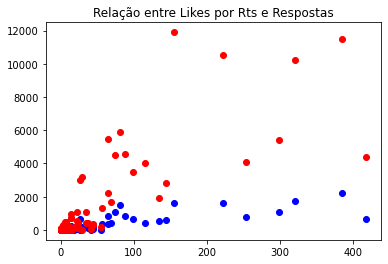

In [51]:
plt.scatter(df['Likes'],df['Retweets'], color = 'blue')
plt.scatter(df['Likes'],df['Text'], color = 'red')
plt.title('Relação entre Likes por Rts e Respostas')
plt.show()

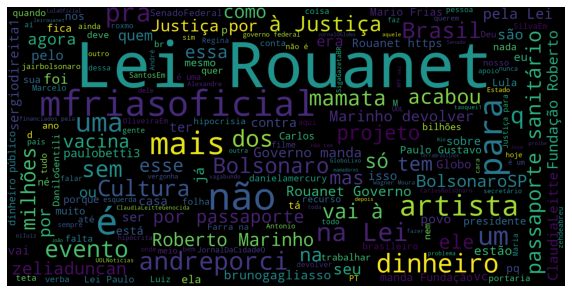

In [73]:
# concatenar as palavras
cols = dataset.dropna(subset=['Comments'], axis=0)['Comments']
all_cols = " ".join(s for s in cols)
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "resposta", "a", "e"
                  , "o", "se", "que"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_cols)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("Tweeter.jfif")

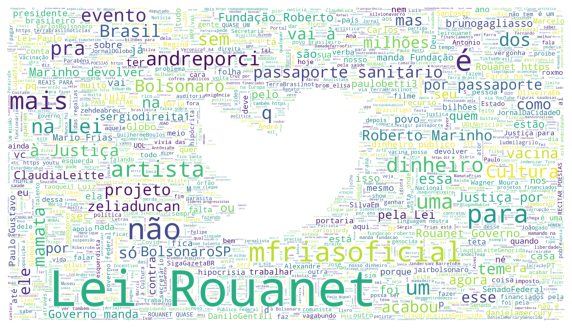

In [76]:
# endereço LOCAL da SUA imagem
tweeter_mask = np.array(Image.open("C:/Users/edard/Mineracao/tweeter.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1000, height=1000, max_words=2000,
                      mask=tweeter_mask, max_font_size=200,
                      min_font_size=1).generate(all_cols)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud)
wordcloud.to_file("tweeter_wordcloud.png")